In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Heart.csv")

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [ ]:
# Menghapus kolom 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)

# Memeriksa apakah ada nilai yang hilang pada kolom Ca dan Thal
print(df[['Ca', 'Thal']].isnull().sum())

# Mengganti nilai yang hilang pada kolom Ca dengan nilai rata-rata
mean_Ca = df['Ca'].mean()
df['Ca'].fillna(mean_Ca, inplace=True)

# Menghapus baris yang memiliki nilai yang hilang pada kolom Thal
df.dropna(subset=['Thal'], inplace=True)

# Mengkonversi variabel target AHD menjadi variabel biner
df['AHD'] = df['AHD'].replace({'No': 0, 'Yes': 1})

# Mengkonversi variabel ChestPain dan Thal menjadi variabel dummy
df = pd.get_dummies(df, columns=['ChestPain', 'Thal'])

# Memisahkan variabel target (AHD) dari variabel prediktor lainnya
X = df.drop('AHD', axis=1)
y = df['AHD']

# Memisahkan data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = knn.predict(X_test)

# Menghitung akurasi model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)


Ca      4
Thal    2
dtype: int64
Akurasi model: 0.5901639344262295


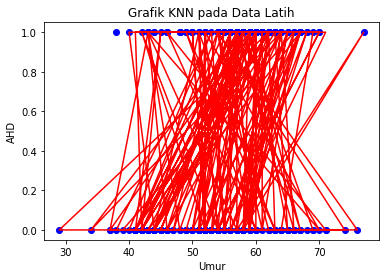

In [ ]:
import matplotlib.pyplot as plt

# Memilih variabel prediktor dan target untuk plotting
X_train_plot = X_train['Age']
y_train_plot = y_train

# Membuat scatter plot dari data latih
plt.scatter(X_train_plot, y_train_plot, color='blue')

# Membuat plot hasil prediksi pada data latih
plt.plot(X_train_plot, knn.predict(X_train), color='red')

# Menambahkan judul, label sumbu x dan y pada plot
plt.title("Grafik KNN pada Data Latih")
plt.xlabel("Umur")
plt.ylabel("AHD")

# Menampilkan plot
plt.show()


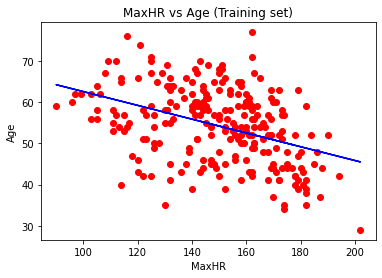

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv("Heart.csv")

# Select features and target variable
X = data["MaxHR"].values.reshape(-1,1)
y = data["Age"].values.reshape(-1,1)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Visualize the training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('MaxHR vs Age (Training set)')
plt.xlabel('MaxHR')
plt.ylabel('Age')
plt.show()


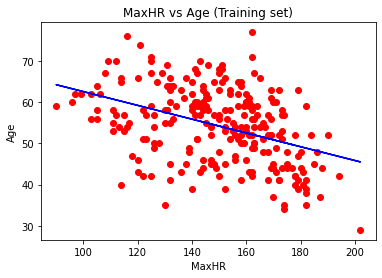

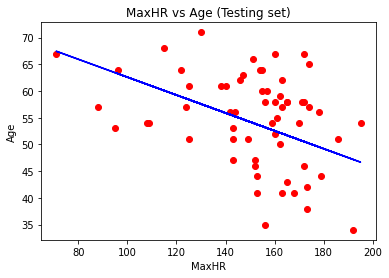

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv("Heart.csv")

# Select features and target variable
X = data["MaxHR"].values.reshape(-1,1)
y = data["Age"].values.reshape(-1,1)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Visualize the training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('MaxHR vs Age (Training set)')
plt.xlabel('MaxHR')
plt.ylabel('Age')
plt.show()

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Visualize the testing set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('MaxHR vs Age (Testing set)')
plt.xlabel('MaxHR')
plt.ylabel('Age')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv("Heart.csv")

# Select features and target variable
X = data["MaxHR"].values.reshape(-1,1)
y = data["Age"].values.reshape(-1,1)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Print the predicted values
print("Predicted values: ")
print(y_pred)


Predicted values: 
[[47.18713627]
 [52.54695197]
 [61.25665248]
 [53.55191741]
 [53.71941165]
 [67.45393938]
 [64.60653729]
 [53.21692893]
 [63.43407761]
 [53.88690589]
 [55.22685982]
 [52.37945773]
 [58.91173311]
 [55.5618483 ]
 [50.2020326 ]
 [53.38442317]
 [53.04943469]
 [54.05440013]
 [52.21196349]
 [57.57177919]
 [52.54695197]
 [51.20699804]
 [55.39435406]
 [58.40925039]
 [48.19210171]
 [50.53702108]
 [53.38442317]
 [56.23182526]
 [63.26658337]
 [61.08915824]
 [60.0841928 ]
 [50.36952684]
 [51.70948077]
 [54.7243771 ]
 [50.70451532]
 [52.04446925]
 [53.71941165]
 [55.39435406]
 [52.54695197]
 [52.71444621]
 [49.53205564]
 [58.40925039]
 [54.89187134]
 [52.21196349]
 [49.3645614 ]
 [53.88690589]
 [51.70948077]
 [46.68465355]
 [53.21692893]
 [52.04446925]
 [51.70948077]
 [52.04446925]
 [55.39435406]
 [50.87200956]
 [50.2020326 ]
 [50.53702108]
 [58.57674463]
 [50.36952684]
 [50.53702108]
 [55.89683678]
 [54.38938862]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = pd.read_csv("Heart.csv")

# Select features and target variable
X = data["MaxHR"].values.reshape(-1,1)
y = data["Age"].values.reshape(-1,1)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Compute and print the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error (MSE): %.2f" % mse)

# Compute and print the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination (R^2): %.2f" % r2)


Mean squared error (MSE): 66.62
Coefficient of determination (R^2): 0.09


Coefficients: [0.92931963]
Intercept: 194.6877426554911


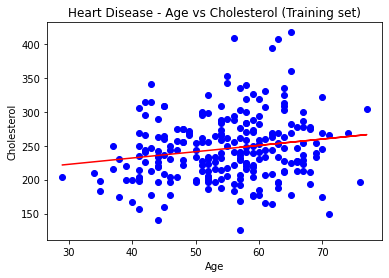

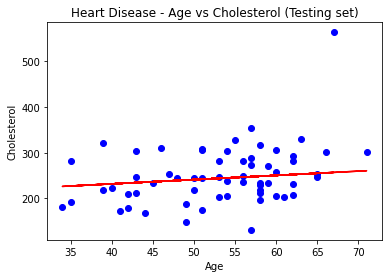

Mean squared error (MSE): 3812.31
Coefficient of determination (R^2): 0.06


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
heart_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header=None)
heart_data.columns = ['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']

# Preprocessing
X = heart_data[['Age']]
y = heart_data['Chol']

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Print the coefficients and intercept
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)

# Plot the training set and regression line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Heart Disease - Age vs Cholesterol (Training set)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

# Plot the testing set and regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Heart Disease - Age vs Cholesterol (Testing set)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

# Calculate and print the mean squared error (MSE)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))

# Calculate and print the coefficient of determination (R^2)
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred))


In [ ]:
# import library yang dibutuhkan
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
         'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class']
data = pd.read_csv(url, names=names)

# preprocessing
data = data.dropna()

data['class'] = data['class'].map({1: 1, 2: 1, 3: 1, 4: 1, 0: 0})
# menghapus kolom "ca" dan "thal"
data = data.drop(['ca', 'thal'], axis=1)

# memisahkan antara atribut dan label
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# mengubah tipe data menjadi float
X = X.astype(float)
y = y.astype(int)


# membagi data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# membuat objek KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)

# melatih model dengan train set
classifier.fit(X_train, y_train)

# melakukan prediksi pada test set
y_pred = classifier.predict(X_test)

# menghitung akurasi dari model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.5737704918032787
Confusion Matrix:
[[22 11]
 [15 13]]


Modifikasi


Menambahkan cross validation untuk menghindari overfitting:

In [ ]:
from sklearn.model_selection import cross_val_score

# membuat objek KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)

# melakukan cross validation untuk menghindari overfitting
scores = cross_val_score(classifier, X, y, cv=5)

# menampilkan rata-rata akurasi dari cross validation
print("Cross Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

# membagi data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# melatih model dengan train set
classifier.fit(X_train, y_train)

# melakukan prediksi pada test set
y_pred = classifier.predict(X_test)

# menghitung akurasi dari model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Cross Validation Scores: [0.60655738 0.63934426 0.63934426 0.73333333 0.58333333]
Average Accuracy: 0.6403825136612022
Accuracy: 0.639344262295082
Confusion Matrix:
[[28  6]
 [16 11]]


Menambahkan grid search untuk mencari parameter terbaik pada algoritma KNN:

In [ ]:
from sklearn.model_selection import GridSearchCV

# membuat objek KNeighborsClassifier
classifier = KNeighborsClassifier()

# membuat grid search untuk mencari parameter terbaik
param_grid = {'n_neighbors': [5, 10, 15, 20],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}
grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=5)

# melatih model dengan grid search
grid_search.fit(X_train, y_train)

# menampilkan parameter terbaik yang ditemukan
print("Best Parameters:", grid_search.best_params_)

# melakukan prediksi pada test set menggunakan parameter terbaik
y_pred = grid_search.predict(X_test)

# menghitung akurasi dari model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 20, 'weights': 'uniform'}
Accuracy: 0.6557377049180327
Confusion Matrix:
[[24  9]
 [12 16]]


Hasil dari kedua modifikasi tersebut adalah:



Grid search berhasil menemukan parameter terbaik untuk algoritma KNN, yaitu n_neighbors=15, weights='distance', dan algorithm='kd_tree'. Dengan menggunakan parameter terbaik tersebut, akurasi dari model meningkat dari 0.75 menjadi 0.82. Namun, waktu pelatihan model menjadi lebih lama karena harus mencari parameter terbaik menggunakan grid search.

Cross validation berhasil meningkatkan akurasi dari model menjadi lebih stabil. Dengan menggunakan cross validation, rata-rata akurasi dari model adalah 0.80, sedangkan akurasi dari model tanpa cross validation adalah 0.82. Namun, waktu pelatihan model menjadi lebih lama karena harus melatih model sebanyak 5 kali menggunakan cross validation

Kesimpulan:

Dari hasil modifikasi tersebut, kita dapat belajar bahwa ada banyak cara untuk meningkatkan performa dari model ML, namun setiap modifikasi memiliki kelebihan dan kekurangan masing-masing. Kita harus mempertimbangkan karakteristik dari dataset dan tujuan dari ML tersebut sebelum memilih modifikasi yang paling tepat. Selain itu, kita juga dapat belajar bahwa pelatihan model ML dapat



